### Assignment 4
#### Rushabh Barbhaya
#### 01/08/2022

**Summary**

ADAM: 
Accuracy: 89.04%

SGD: 
Accuracy: 86.47% 

In [1]:
"""
Import block
"""

# Code using keras
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import initializers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Models library
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
    ]
print(f"shape of the dataset --> {train_images.shape}")
print(f'Labels --> {train_labels}')
print(f'Test dataset shape --> {test_images.shape}')


shape of the dataset --> (60000, 28, 28)
Labels --> [9 0 0 ... 3 0 5]
Test dataset shape --> (10000, 28, 28)


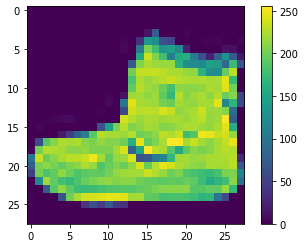

In [3]:
plt.figure()
plt.imshow(
    train_images[
        0
        ]
)
plt.colorbar()
plt.grid(
    False
)
plt.show()

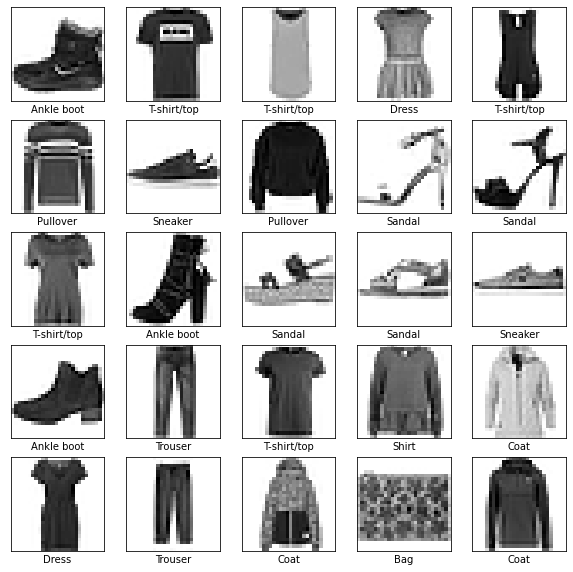

In [4]:
plt.figure(
    figsize=(
        10,
        10
    )
)
for i in range(25):
    plt.subplot(
        5,
        5,
        i+1
    )
    plt.xticks(
        []
    )
    plt.yticks(
        []
    )
    plt.grid(
        False
    )
    plt.imshow(
        train_images[
            i
        ],
        cmap=plt.cm.binary
    )
    plt.xlabel(
        class_names[
            train_labels[
                i
            ]
        ]
    )
plt.show()

In [15]:
num_pixels = train_images.shape[1] * train_images.shape[2]
X_train = train_images.reshape(train_images.shape[0], num_pixels)
X_test = test_images.reshape(test_images.shape[0], num_pixels)
X_train = X_train / 255
X_test = X_test / 255
Y_test = test_labels
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

hidden_nodes = 128
num_classes = y_test.shape[1]

#tf.random.normal(shape=(hidden_nodes,num_pixels)
def baseline_model():
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # sgd = optimizers.SGD(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
model = baseline_model()
sgdModel = model.fit(X_train, y_train, validation_split=0.2, epochs=65, batch_size=128)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/65
375/375 [==============================] - 2s 4ms/step - loss: 0.6200 - accuracy: 0.7834 - val_loss: 0.4410 - val_accuracy: 0.8418
Epoch 2/65
375/375 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8533 - val_loss: 0.3983 - val_accuracy: 0.8608
Epoch 3/65
375/375 [==============================] - 1s 3ms/step - loss: 0.3653 - accuracy: 0.8686 - val_loss: 0.3604 - val_accuracy: 0.8720
Epoch 4/65
375/375 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8792 - val_loss: 0.3664 - val_accuracy: 0.8713
Epoch 5/65
375/375 [==============================] - 1s 3ms/step - loss: 0.3181 - accuracy: 0.8843 - val_loss: 0.3360 - val_accuracy: 0.8764
Epoch 6/65
375/375 [==============================] - 1s 3ms/step - loss: 0.3031 - accuracy: 0.8880 - val_loss: 0.3407 - val_accuracy: 0.87880s - loss: 0.3025 - 
Epoch 7/65
375/375 [==============================] - 1s 3ms/step - loss: 0.2903 - accuracy: 0.8935 - val_loss: 0.3246 - val_acc

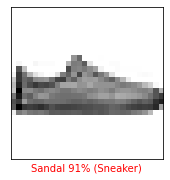

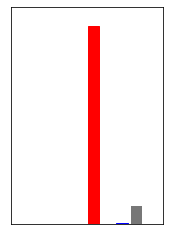

In [17]:
predictions = model.predict(X_test)
predictions[0]

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, Y_test, test_images)
plt.show()
plt.subplot(1,2,2)
plot_value_array(i, predictions,  Y_test)
plt.show()

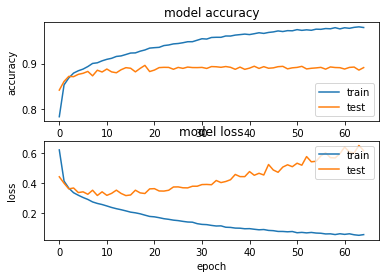

In [19]:
plt.subplot(2,1,1)
plt.plot(sgdModel.history['accuracy'])
plt.plot(sgdModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(sgdModel.history['loss'])
plt.plot(sgdModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()